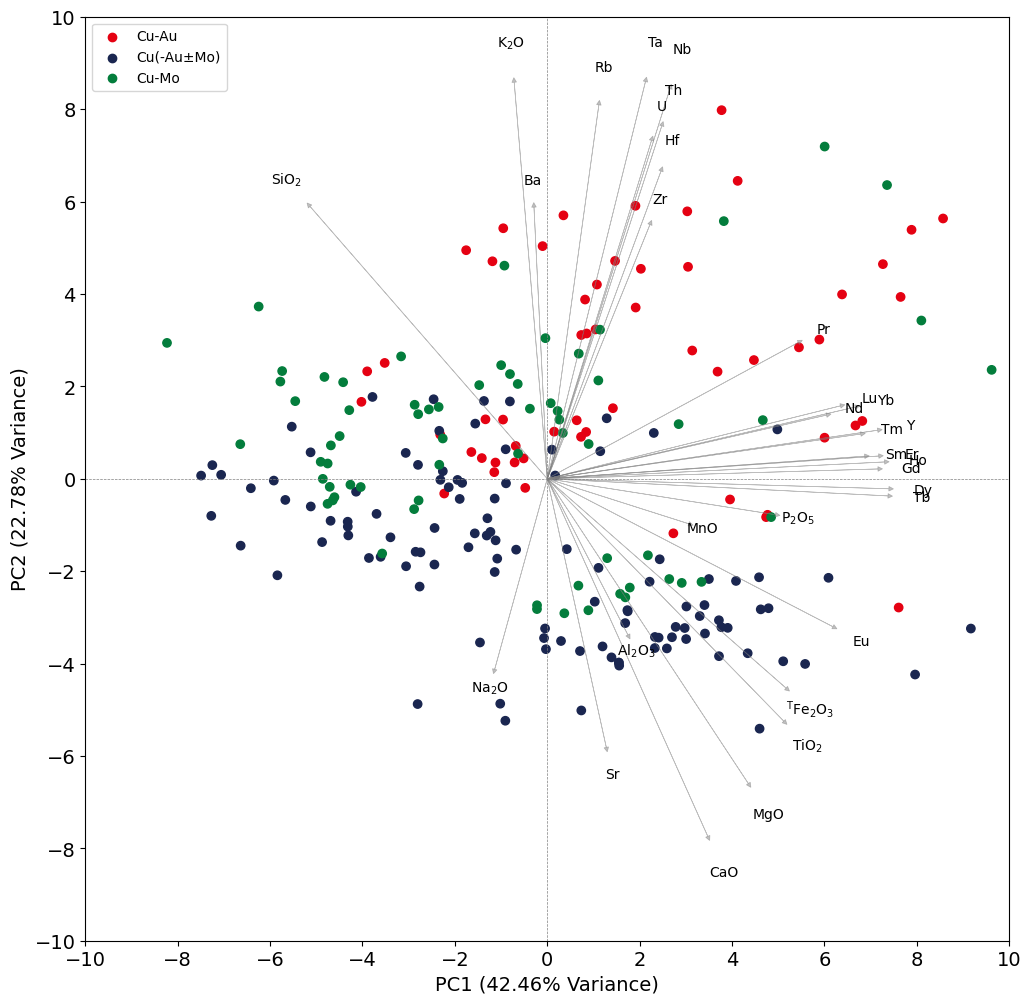

In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
file_path = './DATA.xlsx'
xls = pd.ExcelFile(file_path)

# Load data from each sheet
group1 = pd.read_excel(xls, sheet_name='group1')
group2 = pd.read_excel(xls, sheet_name='group2')
group3 = pd.read_excel(xls, sheet_name='group3')

# Combine all data into a single DataFrame
combined_data = pd.concat([group1, group2, group3])

# Remove non-numeric columns (Deposit name)
numeric_data = combined_data.select_dtypes(include=[np.number])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Apply PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(scaled_data)

# Retrieve loading values for each feature
loadings = pca.components_.T

# Get feature names
feature_names = numeric_data.columns

# Function to convert chemical formula to display-friendly format
def format_chemical_formula(formula):
    formatted_formula = formula.replace("2", "$_2$").replace("3", "$_3$").replace("4", "$_4$").replace("5", "$_5$").replace("TFe", "$^{\\mathrm{T}}$Fe")
    return formatted_formula

# List of formatted feature names
formatted_feature_names = [format_chemical_formula(feature) for feature in feature_names]

# Different colors for each group
colors = ['#E50112', '#1A2650', '#037D3C']
labels = ['Cu-Au', 'Cu(-Au±Mo)', 'Cu-Mo']

# Assign color to each sample
group1_color = [colors[0]] * len(group1)
group2_color = [colors[1]] * len(group2)
group3_color = [colors[2]] * len(group3)

combined_colors = group1_color + group2_color + group3_color

# Increase the arrow length multiplier and set line width
arrow_length_multiplier = 28
arrow_line_width = 0.5


font_size = 14
# Try plotting in a square figure with the right limits
fig, ax = plt.subplots(figsize=(12, 12))

for color, label in zip(colors, labels):
    ax.scatter([], [], c=color, alpha=1, label=label)

ax.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=combined_colors, alpha=1)

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} Variance)', fontsize=font_size)
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} Variance)', fontsize=font_size)
ax.set_xticks(np.arange(-10, 11, 2))
ax.set_yticks(np.arange(-10, 11, 2))
ax.tick_params(axis='both', labelsize=font_size)

# Set limits and aspect ratio
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_aspect('equal', 'box')

# Plot feature loading vectors with longer arrows
for i, (feature, loading) in enumerate(zip(formatted_feature_names, loadings)):
    ax.arrow(0, 0, loading[0] * arrow_length_multiplier, loading[1] * arrow_length_multiplier,
             color='grey', alpha=0.5, head_width=0.1, head_length=0.1, linewidth=arrow_line_width)
    ax.text(loading[0] * arrow_length_multiplier * 1.1, loading[1] * arrow_length_multiplier * 1.1,
            feature, color='black', ha='center', va='center')

ax.axhline(0, color='grey', linestyle='--', linewidth=0.5)
ax.axvline(0, color='grey', linestyle='--', linewidth=0.5)

ax.legend(loc='upper left', )
ax.grid(False)

# Save the figure as PDF
pdf_path = './pca_porphyry_deposits_v2-0510.pdf'
plt.savefig(pdf_path, format='pdf', bbox_inches='tight')

plt.show()